In [12]:
# import the necessary packages
from collections import namedtuple
import numpy as np
import cv2
import matplotlib.pyplot as plt

# define the `Detection` object
Detection = namedtuple("Detection", ("image_path", "gt", "pred"))

In [2]:
gt=[0.059375, 0.592361, 0.117188, 0.376389]
pred=[0.057813, 0.593056, 0.110937, 0.355556]

In [16]:
import pybboxes as pbx

pred=[  0.021875, 0.581944, 0.042188, 0.327778]
image_width, image_height =image_size=(1280, 720)

pbx.convert_bbox(pred, from_type="yolo", to_type="voc",image_size=(1280,720))


(1, 301, 55, 537)

In [17]:
# define the list of example detections
examples =[ 
    Detection("f36.jpg", [ [301, 97, 108, 63]], [301, 97, 108, 63])]
    

In [18]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou


Detection(image_path='f36.jpg', gt=[301, 97, 108, 63], pred=[1, 301, 55, 537])
f36.jpg: 0.8331


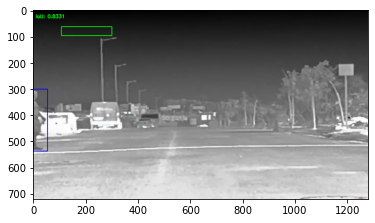

In [19]:
# loop over the example detections
for detection in examples:
    print(detection)
    # load the image
    image = cv2.imread(detection.image_path)
    cv2.rectangle(image, tuple(detection.gt[:2]),
                  tuple(detection.gt[2:]), (0, 255, 0), 2)
    cv2.rectangle(image, tuple(detection.pred[:2]),
                  tuple(detection.pred[2:]), (0, 0, 255), 2)

    # compute the intersection over union and display it
    iou = bb_intersection_over_union(gt, pred)
    cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    print("{}: {:.4f}".format(detection.image_path, iou))
   
    # show the output image
    
    plt.figure()
    plt.imshow(image)
   


In [218]:
# import required module
from PIL import Image

# get image
filepath = "f37.jpg"
img = Image.open(filepath)

# get width and height
width = img.width
height = img.height

# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)


The height of the image is:  720
The width of the image is:  1280
